# TP: Sur-apprentissage, biais-variance

Dans ce TP, nous allons reproduire les expérienxes qui illustrent le cours précédent.

In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


np.set_printoptions(linewidth=500,precision=2,suppress=False)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Importation des données

Observons maintenant l'intégralité des données venant d'une expérience chimique. Elles sont données sous forme de chaine de caractère.

In [3]:
#@title Les données brutes
data_row="""0.000,-0.596
0.000,-0.503
0.000,-0.496
0.001,-0.370
0.001,-0.480
0.001,-0.421
0.001,-0.502
0.002,-0.447
0.002,-0.387
0.002,-0.306
0.002,-0.313
0.002,-0.248
0.003,-0.295
0.003,-0.266
0.004,-0.157
0.004,-0.151
0.004,-0.100
0.005,-0.007
0.006,0.045
0.007,-0.005
0.007,0.165
0.008,0.155
0.009,0.136
0.009,0.317
0.009,0.256
0.010,0.279
0.011,0.355
0.013,0.503
0.014,0.607
0.014,0.565
0.014,0.692
0.014,0.610
0.015,0.632
0.017,0.747
0.017,0.673
0.017,0.826
0.017,0.756
0.017,0.825
0.017,0.811
0.018,0.842
0.018,0.849
0.018,0.800
0.019,0.866
0.019,0.908
0.019,0.879
0.020,0.968
0.021,0.943
0.021,0.900
0.021,0.894
0.022,0.884
0.022,0.992
0.022,0.911
0.022,0.909
0.023,0.945
0.023,0.901
0.024,0.971
0.025,0.949
0.026,0.977
0.026,1.018
0.026,1.004
0.026,0.900
0.026,0.939
0.027,0.989
0.028,0.931
0.028,1.077
0.029,1.072
0.030,0.996
0.030,0.941
0.030,1.053
0.030,0.971
0.031,0.924
0.031,1.054
0.031,0.954
0.032,0.995
0.032,0.858
0.032,0.992
0.033,1.003
0.033,0.950
0.034,0.947
0.035,0.832
0.035,0.950
0.035,0.926
0.036,0.848
0.036,0.890
0.036,0.881
0.037,0.886
0.037,0.812
0.038,0.850
0.039,0.811
0.039,0.872
0.039,0.789
0.039,0.782
0.039,0.822
0.039,0.853
0.040,0.730
0.040,0.839
0.040,0.845
0.040,0.711
0.040,0.693
0.040,0.784
0.040,0.814
0.041,0.725
0.041,0.712
0.041,0.790
0.041,0.730
0.041,0.674
0.041,0.738
0.042,0.653
0.042,0.728
0.042,0.745
0.042,0.723
0.042,0.602
0.042,0.704
0.043,0.721
0.043,0.637
0.044,0.626
0.045,0.556
0.045,0.658
0.045,0.671
0.045,0.622
0.046,0.591
0.046,0.587
0.046,0.638
0.047,0.423
0.047,0.472
0.047,0.595
0.048,0.488
0.048,0.561
0.048,0.477
0.048,0.491
0.048,0.384
0.049,0.339
0.051,0.324
0.052,0.262
0.052,0.278
0.052,0.322
0.053,0.235
0.053,0.182
0.053,0.179
0.054,0.148
0.054,0.299
0.054,0.172
0.056,0.118
0.056,0.119
0.056,0.092
0.057,0.064
0.057,0.077
0.057,0.099
0.058,0.068
0.058,0.044
0.058,0.047
0.058,0.190
0.058,0.036
0.059,0.080
0.060,-0.068
0.061,-0.093
0.061,-0.087
0.061,0.033
0.062,-0.067
0.063,-0.120
0.064,-0.173
0.065,-0.164
0.065,-0.172
0.065,-0.242
0.066,-0.237
0.066,-0.359
0.066,-0.244
0.067,-0.181
0.067,-0.328
0.067,-0.287
0.068,-0.398
0.069,-0.294
0.069,-0.321
0.070,-0.441
0.070,-0.345
0.070,-0.348
0.070,-0.460
0.071,-0.370
0.071,-0.416
0.071,-0.390
0.072,-0.470
0.073,-0.433
0.073,-0.468
0.073,-0.480
0.073,-0.524
0.074,-0.457
0.074,-0.466
0.074,-0.475
0.075,-0.452
0.075,-0.507
0.075,-0.574
0.076,-0.515
0.076,-0.621
0.076,-0.590
0.076,-0.491
0.076,-0.537
0.077,-0.564
0.077,-0.596
0.077,-0.576
0.078,-0.625
0.080,-0.685
0.080,-0.682
0.081,-0.663
0.081,-0.706
0.081,-0.650
0.081,-0.599
0.081,-0.651
0.081,-0.713
0.081,-0.776
0.082,-0.660
0.082,-0.674
0.082,-0.769
0.082,-0.782
0.083,-0.715
0.083,-0.752
0.084,-0.726
0.084,-0.709
0.084,-0.780
0.084,-0.712
0.085,-0.851
0.086,-0.758
0.086,-0.779
0.086,-0.841
0.086,-0.714
0.087,-0.767
0.087,-0.848
0.087,-0.739
0.087,-0.763
0.087,-0.772
0.089,-0.882
0.089,-0.821
0.089,-0.866
0.090,-0.779
0.090,-0.787
0.091,-0.886
0.092,-0.812
0.092,-0.961
0.092,-0.860
0.092,-0.868
0.093,-0.892
0.093,-0.938
0.093,-0.937
0.094,-0.973
0.094,-0.834
0.094,-0.955
0.094,-0.888
0.094,-0.833
0.094,-0.948
0.094,-0.831
0.095,-0.894
0.096,-0.913
0.096,-0.820
0.096,-1.006
0.096,-0.893
0.097,-0.971
0.097,-0.970
0.097,-0.888
0.098,-0.933
0.098,-0.969
0.098,-0.975
0.098,-1.040
0.099,-0.906
0.100,-0.986
0.101,-1.036
0.101,-0.935
0.104,-0.957
0.104,-0.961
0.105,-0.965
0.106,-0.988
0.106,-0.978
0.107,-0.937
0.110,-0.949
0.116,-0.978
0.117,-0.921
0.118,-1.020
0.120,-0.961
0.120,-1.022
0.121,-1.018
0.123,-0.980
0.124,-0.982
0.124,-0.982
0.126,-0.989
0.126,-0.910
0.126,-0.932
0.130,-0.974
0.131,-0.953
0.133,-0.908
0.136,-0.917
0.137,-0.978
0.138,-0.950
0.138,-0.841
0.140,-0.824
0.143,-0.830
0.145,-0.888
0.145,-0.817
0.145,-0.832
0.148,-0.760
0.150,-0.687
0.150,-0.789
0.151,-0.810
0.156,-0.742
0.156,-0.807
0.157,-0.677
0.157,-0.703
0.158,-0.573
0.158,-0.647
0.158,-0.706
0.159,-0.684
0.161,-0.523
0.161,-0.591
0.167,-0.589
0.170,-0.533
0.171,-0.542
0.173,-0.517
0.173,-0.468
0.174,-0.459
0.174,-0.538
0.180,-0.386
0.181,-0.404
0.182,-0.390
0.182,-0.372
0.182,-0.408
0.183,-0.303
0.184,-0.403
0.188,-0.281
0.189,-0.289
0.191,-0.202
0.192,-0.218
0.193,-0.236
0.194,-0.191
0.196,-0.238
0.196,-0.288
0.197,-0.255
0.197,-0.110
0.198,-0.132
0.204,-0.128
0.204,-0.111
0.205,-0.157
0.207,-0.081
0.207,-0.052
0.208,-0.064
0.210,-0.133
0.210,-0.168
0.210,-0.067
0.211,-0.074
0.217,-0.035
0.221,0.067
0.223,0.035
0.223,0.086
0.225,0.017
0.226,0.088
0.228,-0.008
0.228,0.083
0.228,0.087
0.228,0.154
0.229,0.095
0.232,0.185
0.232,0.188
0.233,0.192
0.234,0.126
0.234,0.087
0.236,0.158
0.239,0.186
0.240,0.251
0.240,0.159
0.244,0.244
0.246,0.193
0.248,0.296
0.248,0.288
0.249,0.302
0.249,0.243
0.250,0.274
0.250,0.197
0.252,0.340
0.255,0.357
0.255,0.392
0.256,0.345
0.260,0.312
0.263,0.299
0.263,0.475
0.263,0.389
0.263,0.335
0.263,0.403
0.264,0.325
0.265,0.386
0.265,0.355
0.266,0.456
0.266,0.366
0.268,0.420
0.270,0.275
0.270,0.402
0.270,0.490
0.275,0.502
0.275,0.467
0.281,0.385
0.281,0.562
0.283,0.570
0.283,0.476
0.288,0.468
0.289,0.528
0.289,0.431
0.290,0.564
0.292,0.554
0.295,0.622
0.296,0.673
0.297,0.564
0.297,0.591
0.302,0.588
0.304,0.696
0.305,0.609
0.306,0.691
0.306,0.644
0.306,0.688
0.306,0.630
0.310,0.596
0.310,0.682
0.312,0.629
0.313,0.665
0.314,0.700
0.318,0.656
0.318,0.761
0.319,0.679
0.320,0.625
0.322,0.631
0.325,0.707
0.325,0.669
0.327,0.685
0.327,0.719
0.327,0.767
0.328,0.594
0.328,0.669
0.330,0.678
0.330,0.716
0.332,0.746
0.334,0.816
0.336,0.775
0.341,0.755
0.341,0.804
0.342,0.816
0.345,0.734
0.347,0.789
0.347,0.820
0.348,0.823
0.348,0.760
0.349,0.749
0.349,0.837
0.352,0.753
0.356,0.772
0.356,0.901
0.356,0.870
0.357,0.794
0.357,0.803
0.359,0.819
0.359,0.838
0.360,0.802
0.365,0.845
0.366,0.718
0.366,0.743
0.368,0.900
0.368,0.809
0.368,0.829
0.371,0.913
0.372,0.915
0.373,0.785
0.374,0.788
0.378,0.862
0.379,0.882
0.383,0.892
0.386,0.911
0.389,0.938
0.391,0.788
0.392,0.993
0.395,0.933
0.395,0.879
0.397,0.876
0.397,0.852
0.397,0.904
0.397,0.831
0.397,0.939
0.398,0.902
0.401,0.969
0.402,0.904
0.402,0.922
0.404,0.897
0.406,0.845
0.408,0.904
0.408,0.994
0.411,0.886
0.411,0.914
0.412,0.902
0.413,1.016
0.416,0.928
0.416,0.922
0.418,0.904
0.418,0.931
0.419,0.905
0.422,0.970
0.424,0.977
0.424,0.967
0.425,1.025
0.425,0.981
0.426,0.931
0.427,0.973
0.427,0.919
0.428,0.872
0.428,0.945
0.431,0.958
0.431,1.014
0.432,0.943
0.433,0.939
0.434,0.980
0.435,1.046
0.437,0.873
0.440,1.113
0.443,0.954
0.444,0.987
0.446,0.957
0.447,0.919
0.448,0.914
0.449,1.036
0.450,0.874
0.451,1.037
0.455,1.004
0.457,0.981
0.460,1.016
0.460,1.044
0.461,0.969
0.463,1.045
0.465,0.953
0.467,0.925
0.467,0.997
0.468,0.934
0.469,0.994
0.470,0.990
0.471,0.974
0.473,0.916
0.474,0.953
0.475,0.996
0.475,1.011
0.476,1.045
0.478,1.022
0.478,0.906
0.484,0.960
0.485,0.964
0.486,0.990
0.487,0.931
0.487,1.023
0.487,0.977
0.487,1.061
0.492,0.989
0.494,0.976
0.495,0.979
0.496,0.993
0.497,1.130
0.497,1.025
0.498,1.027
0.500,1.004
0.502,1.044
0.503,0.969
0.503,1.028
0.504,1.060
0.505,1.040
0.507,1.008
0.508,1.046
0.509,0.954
0.511,1.028
0.512,0.907
0.513,1.029
0.513,0.946
0.513,0.937
0.515,0.966
0.515,1.042
0.516,0.852
0.517,0.977
0.518,1.080
0.520,1.043
0.522,0.936
0.524,1.090
0.525,1.066
0.527,1.014
0.528,1.027
0.529,1.010
0.529,0.990
0.530,0.916
0.531,0.939
0.531,0.981
0.534,0.976
0.534,0.962
0.537,1.008
0.539,0.994
0.540,0.964
0.540,0.998
0.540,1.045
0.544,1.039
0.544,0.999
0.544,0.966
0.545,0.969
0.545,1.055
0.546,1.060
0.547,0.992
0.547,0.961
0.548,1.015
0.548,1.088
0.548,0.965
0.550,1.002
0.550,0.960
0.551,0.914
0.551,1.022
0.553,0.951
0.553,1.021
0.554,1.110
0.554,0.948
0.555,0.951
0.557,0.944
0.557,1.005
0.557,1.005
0.561,1.040
0.563,0.979
0.564,0.932
0.565,0.911
0.567,1.027
0.567,0.961
0.567,0.987
0.567,0.998
0.568,0.862
0.570,0.932
0.570,0.969
0.571,0.966
0.573,0.920
0.573,1.014
0.573,0.989
0.574,1.007
0.574,0.980
0.576,0.992
0.577,1.004
0.578,1.044
0.578,1.086
0.580,0.891
0.581,0.964
0.586,0.982
0.586,1.024
0.589,0.974
0.589,1.049
0.589,1.081
0.590,0.907
0.591,1.020
0.591,0.979
0.597,1.008
0.599,1.022
0.600,1.056
0.602,1.024
0.602,1.088
0.603,0.962
0.603,0.962
0.603,0.988
0.604,0.957
0.607,0.979
0.608,0.993
0.609,1.033
0.610,0.993
0.611,1.009
0.611,1.009
0.613,0.881
0.618,0.983
0.620,1.079
0.620,0.921
0.621,0.963
0.621,1.039
0.623,0.922
0.623,0.985
0.624,1.013
0.624,0.941
0.626,0.930
0.626,0.932
0.628,0.934
0.629,0.970
0.631,0.975
0.634,0.966
0.634,0.933
0.637,1.029
0.640,0.928
0.642,0.964
0.642,0.970
0.643,0.902
0.644,0.987
0.645,1.028
0.645,1.037
0.645,0.995
0.646,0.990
0.646,0.959
0.647,0.990
0.647,0.918
0.648,1.025
0.648,0.925
0.650,0.981
0.651,1.004
0.651,0.976
0.652,0.991
0.653,0.991
0.655,0.953
0.655,0.954
0.655,0.933
0.656,0.991
0.661,1.046
0.661,1.053
0.662,0.989
0.663,0.916
0.663,0.944
0.663,0.852
0.664,1.025
0.665,0.928
0.665,0.982
0.666,0.956
0.666,1.030
0.667,0.954
0.669,0.891
0.670,0.992
0.679,0.949
0.679,0.938
0.680,0.877
0.680,0.956
0.681,0.955
0.682,0.890
0.686,0.991
0.687,1.012
0.690,0.834
0.690,0.946
0.691,0.986
0.692,0.926
0.694,0.841
0.695,0.931
0.695,0.958
0.696,0.965
0.697,0.896
0.698,0.963
0.698,0.959
0.699,0.939
0.699,0.866
0.700,0.943
0.700,0.885
0.700,0.938
0.701,1.020
0.702,0.893
0.702,0.907
0.705,0.978
0.706,1.000
0.707,0.868
0.708,0.971
0.708,0.946
0.708,1.027
0.712,0.995
0.712,0.889
0.715,0.916
0.715,0.944
0.720,0.952
0.721,0.925
0.722,0.954
0.723,0.943
0.723,0.935
0.725,0.826
0.725,0.975
0.725,0.856
0.727,0.941
0.727,0.885
0.728,0.895
0.728,0.903
0.729,0.956
0.729,0.890
0.730,0.942
0.732,0.896
0.732,0.985
0.734,0.954
0.735,0.882
0.735,0.887
0.738,0.913
0.738,1.040
0.739,0.905
0.739,0.942
0.740,0.936
0.741,0.907
0.742,0.944
0.742,0.909
0.742,0.982
0.743,0.889
0.744,0.924
0.744,0.885
0.744,0.839
0.745,0.938
0.746,0.984
0.749,0.915
0.752,0.964
0.754,0.925
0.760,0.895
0.760,1.005
0.761,0.888
0.762,0.908
0.764,0.972
0.765,0.856
0.766,0.993
0.770,0.853
0.771,0.957
0.771,0.948
0.772,0.999
0.773,0.899
0.774,0.896
0.775,0.922
0.779,0.935
0.782,0.919
0.783,0.933
0.784,0.883
0.784,0.872
0.785,0.868
0.787,0.891
0.787,1.006
0.788,0.834
0.788,0.881
0.788,0.841
0.789,0.926
0.790,0.935
0.791,0.889
0.792,0.899
0.792,0.851
0.792,0.949
0.795,0.835
0.795,0.929
0.795,0.797
0.797,0.884
0.797,1.026
0.797,0.846
0.798,0.950
0.800,0.895
0.801,0.893
0.801,0.911
0.802,0.805
0.803,0.916
0.804,0.863
0.806,0.851
0.811,0.915
0.811,0.892
0.812,0.982
0.813,0.990
0.813,0.818
0.818,0.830
0.818,0.907
0.821,0.851
0.822,0.900
0.822,0.882
0.824,0.858
0.824,0.799
0.825,0.910
0.827,0.944
0.829,0.811
0.830,0.905
0.830,0.861
0.830,0.907
0.831,0.846
0.833,0.860
0.835,0.876
0.836,0.971
0.838,0.884
0.838,0.888
0.842,0.907
0.842,0.865
0.843,0.898
0.844,0.810
0.845,0.786
0.846,0.860
0.847,0.841
0.847,0.830
0.847,0.821
0.848,0.748
0.849,0.809
0.853,0.842
0.855,0.905
0.855,0.837
0.858,0.850
0.858,0.865
0.859,0.847
0.860,0.882
0.860,0.852
0.861,0.839
0.861,0.821
0.862,0.830
0.862,0.968
0.865,0.799
0.867,0.845
0.868,0.899
0.869,0.888
0.870,0.780
0.870,0.773
0.871,0.864
0.871,0.839
0.872,0.899
0.873,0.874
0.875,0.876
0.875,0.895
0.877,0.945
0.878,0.864
0.883,0.856
0.884,0.804
0.884,0.867
0.884,0.769
0.884,0.897
0.887,0.896
0.887,0.883
0.888,0.814
0.890,0.864
0.892,0.831
0.899,0.885
0.902,0.774
0.902,0.817
0.904,0.840
0.904,0.765
0.905,0.792
0.906,0.816
0.906,0.841
0.911,0.735
0.911,0.916
0.911,0.803
0.913,0.771
0.914,0.847
0.914,0.830
0.915,0.875
0.916,0.846
0.917,0.877
0.917,0.866
0.919,0.761
0.920,0.817
0.922,0.784
0.922,0.739
0.925,0.749
0.925,0.852
0.929,0.815
0.929,0.883
0.931,0.908
0.932,0.876
0.935,0.854
0.935,0.768
0.936,0.802
0.936,0.873
0.937,0.780
0.937,0.766
0.938,0.810
0.939,0.889
0.940,0.781
0.940,0.831
0.944,0.832
0.946,0.856
0.946,0.851
0.947,0.844
0.949,0.829
0.951,0.788
0.951,0.822
0.953,0.717
0.954,0.828
0.954,0.788
0.955,0.862
0.957,0.883
0.958,0.819
0.958,0.840
0.959,0.818
0.959,0.811
0.963,0.860
0.964,0.775
0.964,0.883
0.964,0.808
0.964,0.768
0.965,0.760
0.966,0.760
0.966,0.772
0.966,0.778
0.968,0.856
0.968,0.862
0.969,0.769
0.969,0.739
0.971,0.794
0.972,0.827
0.976,0.783
0.978,0.803
0.978,0.774
0.979,0.812
0.979,0.825
0.981,0.756
0.981,0.739
0.982,0.823
0.982,0.872
0.982,0.803
0.984,0.786
0.988,0.742
0.990,0.775
0.991,0.774
0.992,0.858
0.993,0.752
0.993,0.745
0.993,0.718
0.993,0.790
0.994,0.806
0.998,0.836
0.998,0.839
0.999,0.723"""

***NB:*** Pensez à compiler le code ci-dessus, même s'il est masqué.

In [4]:
data_row=data_row.split("\n")
data_row=[line.split(",") for line in data_row]
data_row
xy_all=np.array(data_row).astype(np.float64)

In [5]:
np.random.seed(50)
np.random.shuffle(xy_all)
xy_all.shape

Expliquones le code précédent: Les données étaient fournies sous forme d'une chaine de caractére, il a fallu les transfromée en matrice numpy.

Si les données avait été donnée à l'aide d'un fichier csv, on aurait pu simplement les importer avec:

    xy_all = np.loadtxt("adresse_du_fichier_csv", delimiter=",")

#### →♡♡


Pour traiter les données, on a utilisé la fonction `split(arg)` qui transforme une <font color="red"> □ □ □ </font> en une liste de <font color="red"> □ □ □ </font> en la découpant aux endroits <font color="red"> □ □ □ </font>.

Séparons les données en deux paquets:

In [6]:
nb_train_all=500
xy_train_all=xy_all[:nb_train_all]
xy_test=xy_all[nb_train_all:]

In [7]:
x_train_all,y_train_all=xy_train_all[:,0],xy_train_all[:,1]
x_train_all.shape,y_train_all.shape

In [8]:
#pour faire des plot plus joli, les données 'test' sont ordonnées selon les x
x_test,y_test=xy_test[:,0],xy_test[:,1]
indices_to_sort=np.argsort(x_test)
x_test=x_test[indices_to_sort]
y_test=y_test[indices_to_sort]

Pour ce TP, on va se placer dans une situation assez peu fréquente en traitement des données:

On disposera d'un gros jeu test qui nous permettra de juger très précisément nos apprentissages, comme si on disposait d'un arbitre impartial.

In [9]:
x_test.shape,y_test.shape

Et on ne disposera que de petits échantillons train, pour immiter la situation classique où il est difficile de collecter des données:

In [10]:
x_train,y_train=x_train_all[:50],y_train_all[:50]
x_train.shape,y_train.shape

#### →♡♡

In [11]:
fig,ax=plt.subplots()


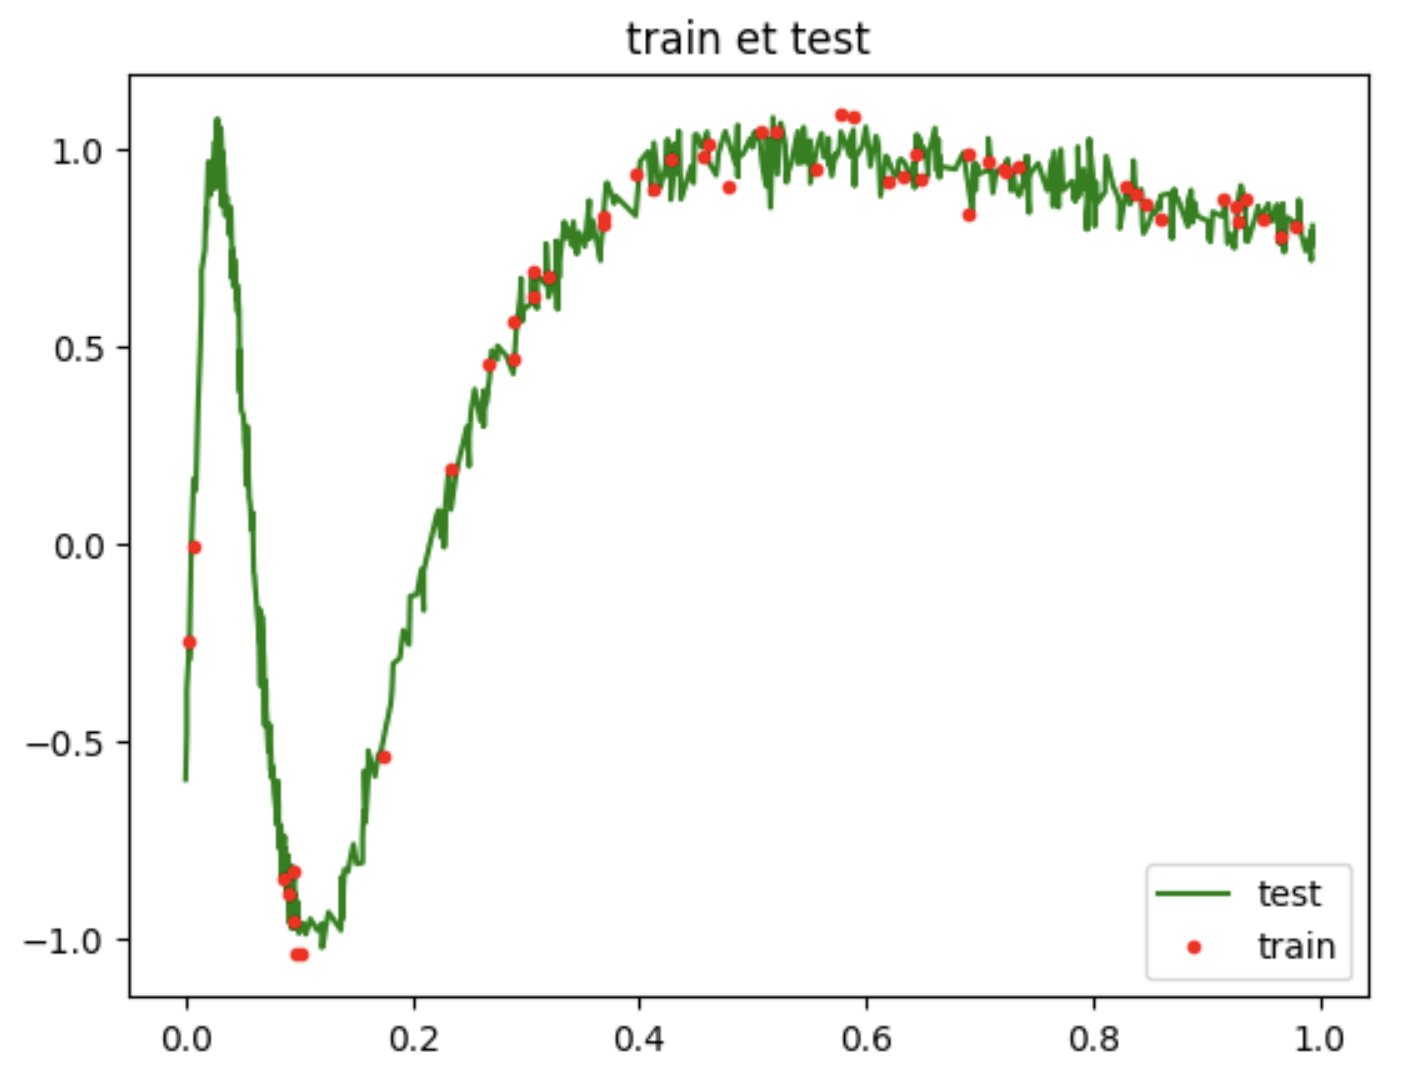

Le but de notre apprentissage est d'arriver à prédire les ordonnées à partir des abscisses que l'on aura préalablement étendues.

### Extention des inputs

#### →♡♡♡

In [12]:
def expand_x(x,freqMax):

    res=[]

    res.append(np.ones_like(x))
    res.append(x)
    #Complétez


Créons une fonction `expand_x(x,freqMax)`:
* `x` est un vecteur de points dans [0,1]
* `freqMax` est un entier.
* Le résultat de la fonction est une matrice dont les colonnes sont:

    * une colonne avec que des 1
    * une colonne qui contient x
    * puis des colonnes contenant les vecteurs
$\sin(n \,2\pi x)$ et $\cos(n \, 2\pi x)$ pour $n$ de 1 à `freqMax`

***Remarque:*** Comme on a mis les variables descriptives en colonne, on obtient une disposition dataFrame

Validons notre programme sur un petit jeu de données:

In [13]:
x=np.arange(0,4,0.5)
np.set_printoptions(precision=2,suppress=True)
expand_x(x,2)

    array([[ 1. ,  0. ,  0. ,  1. ,  0. ,  1. ],
        [ 1. ,  0.5,  0. , -1. , -0. ,  1. ],
        [ 1. ,  1. , -0. ,  1. , -0. ,  1. ],
        [ 1. ,  1.5,  0. , -1. , -0. ,  1. ],
        [ 1. ,  2. , -0. ,  1. , -0. ,  1. ],
        [ 1. ,  2.5,  0. , -1. , -0. ,  1. ],
        [ 1. ,  3. , -0. ,  1. , -0. ,  1. ],
        [ 1. ,  3.5,  0. , -1. , -0. ,  1. ]])

Validons notre programme sur un gros jeu de données

In [14]:
x=np.linspace(0,1,100)
x_ext=expand_x(x,2)
print(x_ext.shape) #toujours vérifier la shape

In [15]:
for j in range(x_ext.shape[1]):
    y=x_ext[:,j]
    plt.plot(x,y)

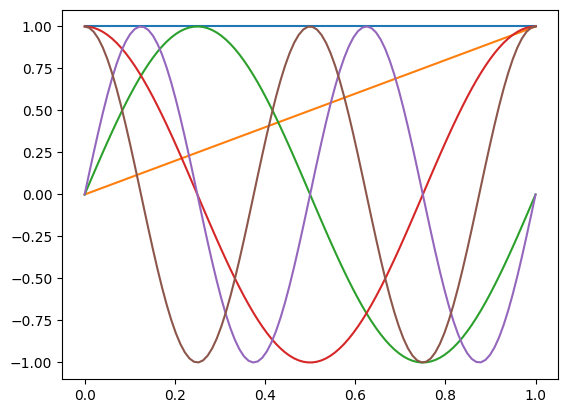

#### →♡


La théorie des <font color="red"> □ □ □ </font> nous indique qu'un modèle avec des extentions sin-cos permettra de reconstituer toutes les fonctions (si on ajoutait un nombre infini de fréquence).  

Notre modèle ne produira pas de phénomène de Gipps aux extréminité car dans les colonnes il y a <font color="red"> □ □ □ </font>.


**Remarque:**  Intuitivement  vaut-il mieux utiliser des sinus-cosinus plutôt que des polynomes pour nos données car elle oscillent beaucoup aux allentour de 0.





##  Observer le sur-apprentissage

Ainsi, au lieu le chercher à expliquer $y$ à partir de seulement $x$, on cherchera à l'expliquer à partir de $1,x$ et les $\sin(\nu\,2\pi x),\cos(\nu\,2\pi x)$ pour $\nu$ allant de 1 à `freqMax`.

Plus `freqMax` est grand et plus on utilise un modèle complexe. Mais on a voir qu'il n' faut pas non plus prendre un modèle trop complexe, au risque de sur-apprendre les données `train`



### Objectif


Nous allons écrire une fonction

    predictionFunction_sinCos(x_train,y_train,x_test,freqMax)


qui effectue l'extension des données `x_train`, puis fit un modèle linéaire de `sklearn`, puis renvoie la prédiction les `y_test` à partir des `x_test`.



### Aide: Regression clé en main


Voici comment on créer un modèle linéaire avec `sklearn`

In [21]:
import sklearn
import numpy as np

In [22]:
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
#it_intercept=False car on va nous même ajouter une colonne de 1 dans les données.

In [23]:
#données bidon
x_train_bidon=np.array([[1.,1,1],[1,2,3]]).T
x_train_bidon

In [24]:
y_train_bidon=2*x_train_bidon[:,1]+1
y_train_bidon

In [25]:
model.fit(x_train_bidon,y_train_bidon);

In [26]:
x_test_bidon=np.array([[1.,1,1],[3,4,5]]).T
y_test_bidon=model.predict(x_test_bidon)
print(y_test_bidon)

In [ ]:
model.coef_

#### →♡♡♡

Retrouvons par nous même ces coefficiens:

In [ ]:
np.linalg.inv(x_train_bidon.T ...


### Complétons notre fonction:

#### →♡♡♡

In [ ]:
def predictionFunction_sinCos(x_train,y_train,x_test,freqMax):
    x_train_exp=
    model =
    model.fit(
    x_test_exp=
    return model.


In [ ]:
freqMaxs=[2,10]
nb=len(freqMaxs)
fig,axs=plt.subplots(nb,1,figsize=(10,3*nb))
for i,freqMax in enumerate(freqMaxs):
    y_pred=predictionFunction_sinCos(x_train,y_train,x_test,freqMax)
    axs[i].plot(x_test,y_pred,label="pred")
    axs[i].plot(x_train,y_train,".",label="train")
    axs[i].plot(x_test,y_test,label="true")
    axs[i].legend()
    axs[i].set_title(f"freqMax:{freqMax}")

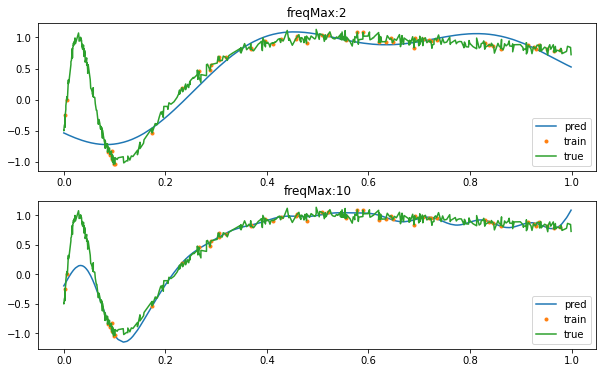

Choisissez un peu mieux la liste `freqMaxs` pour mieux mettre en avant le sur-apprentissage.

## La balance (trade-off) biais-variance

### Plusieurs jeux train

La fonction suivante permet de produire un jeu de `x_train`, `y_train` tiré aléatoirement dans les données initiales. On simule ainsi le fait qu'il y a un aléa dans la collecte des données d'entrainement.

In [ ]:
def extractTrainDataRandomly(trainSize):
    shuffleIndex = np.random.permutation(xy_train_all.shape[0])
    selectedIndices=shuffleIndex[:trainSize]
    x_train = xy_train_all[selectedIndices, 0]
    y_train = xy_train_all[selectedIndices, 1]
    return x_train,y_train

#teston
x_train,y_train=extractTrainDataRandomly(50)
x_train.shape,y_train.shape

Voici une seconde fonction qui fait presque la même chose. Pourquoi "presque"?

        def extractTrainDataRandomly_2(trainSize):
            selectedIndices = np.random.randint(0,xy_train_all.shape[0],size=[trainSize],)
            x_train = xy_train_all[selectedIndices, 0]
            y_train = xy_train_all[selectedIndices, 1]
            return x_train,y_train

#### →♡

Contrairement à la fonction précédente,<font color="red"> □ □ □ </font>


### Estimons numériquement le biais et la variance


Grâce à la fonction précédente, on pourra tirer plusieurs réalisations  d'échantillons d'apprentissage $(tr_i)_{i\in 1..I}$.

Par contre on utilisera qu'une réalisation d'un échantillon test $(x_j,y_j)_{j\in 1..J}$ (un gros échantillon qui nous sert d'arbitre impartial).



Ainsi la décomposition biais variance pour une valeur test $(x,y)$  est:
\begin{alignat*}{1}
\mathbf E \Big(  \hat f_{T_r}(x)  - y \Big)^2
&=  \mathbf E \Big(  \hat f_{T_r}(x)  -  \mathbf E[ \hat f_{T_r}(x)]  \Big )^2  \ \  + \  \      \Big(  \mathbf E[ \hat f_{T_r}(x)  ]-    y \Big)^2
\end{alignat*}
Elle s'estime par :
\begin{alignat*}{1}
\text{mean}_{i}  \Big[    (\hat f_{tr_i}(x)  - y )^2   \Big]  
&\simeq  \text{mean}_{i}   \Big[   ( \hat f_{tr_i}(x)  - \text{mean}_{k}[ \hat f_{tr_k}(x)]   )^2  \Big]  \ \  + \  \      \Big(   \text{mean}_{i}[ \hat f_{tr_i}(x)  ]-    y \Big)^2 \\
&\simeq  \text{std}^2_{i}   \Big[   \hat f_{tr_i}(x)  \Big]   \ \  + \  \      \Big(   \text{mean}_{i}[ \hat f_{tr_i}(x)  ]-    y \Big)^2 \\
\end{alignat*}

La décomposition biais-variance moyenne sur le jeu test:
\begin{alignat*}{1}
\mathbf E \Big(  \hat f_{T_r}(X)  - Y \Big)^2  &=  \mathbf E \Big(  \hat f_{T_r}(X)  -  \mathbf E[ \hat f_{T_r}(X)]  \Big )^2   \ \  + \  \     \mathbf E\Big(  \mathbf E[ \hat f_{T_r}(X)  ]-    Y  \Big)^2   \\
\end{alignat*}
s'estime par :
\begin{alignat*}{1}
\text{mean}_{j} \ \text{mean}_{i}  \Big[    (\hat f_{tr_i}(x_j)  - y_j )^2   \Big]  
 \simeq \text{mean}_{j} \  \text{std}^2_{i}   \Big[   \hat f_{tr_i}(x_j)  \Big]   \ \  + \  \    \text{mean}_{j}   \Big(   \text{mean}_{i}[ \hat f_{tr_i}(x_j)  ]-    y_j \Big)^2 \\
\end{alignat*}





### Remarque sur la "forme"


Ecrire du pseudo code aide beaucoup pour simplémenter des formules ou des algorithme. Au dessus, on a utilisé des notations proches de numpy :
     
* $\text{mean}_i[u]$  pour `np.mean(u,axis=0)`
* $\text{std}^2_i[u]$  pour `np.std(u,axis=0)**2`
     

Mathématiquement, la formule d'estimation aurait plutôt été :
\begin{alignat*}{1}
\frac 1 {I J} \sum_{i,j}  \Big(  \hat f_{tr_i}(x_j)  - y_j \Big)^2  &\simeq
\frac 1 {I J}  \sum_{i,j} \Big(  \hat f_{tr_i}(x_j)  -  \frac 1 I  \sum_{k} \hat f_{tr_k}(x_j)  \Big )^2   \ \  + \  \   \frac 1 { J}\sum_{j}   \Big(  \frac 1 I \sum_k  \hat f_{tr_k}(x_j)  -    y_j  \Big)^2   \\
\end{alignat*}
Ce qui est plus compliqué à transformer en code  !



## Programme final


### →♡♡♡

In [ ]:
nbEssaies=1000
test_size=len(x_test)
trainSize=50

tunings=[1,2,3,4,5,6,7] #c'est des freqMax que l'on va faire varier
tuning_to_variances=[]
tuning_to_bias=[]
tuning_to_loss=[]

for tuning in tunings:
    estimations= np.zeros([nbEssaies,test_size])
    for essaie in range(nbEssaies):
        x_train, y_train = extractTrainDataRandomly(trainSize)
        y_pred = predictionFunction_sinCos(x_train, y_train, x_test, tuning)
        estimations[essaie,:]=y_pred

    """le premier np.mean c'est la moyenne sur les données test.
    la seconde opération s'effectue sur les différents essaies."""
    tuning_to_variances.append(...)
    tuning_to_bias.append(...)
    tuning_to_loss.append(...)

plt.plot(tunings,tuning_to_variances,label="variance")
plt.plot(tunings,tuning_to_bias,label="biais")
plt.plot(tunings,tuning_to_loss,label="loss")

plt.legend(loc=2);

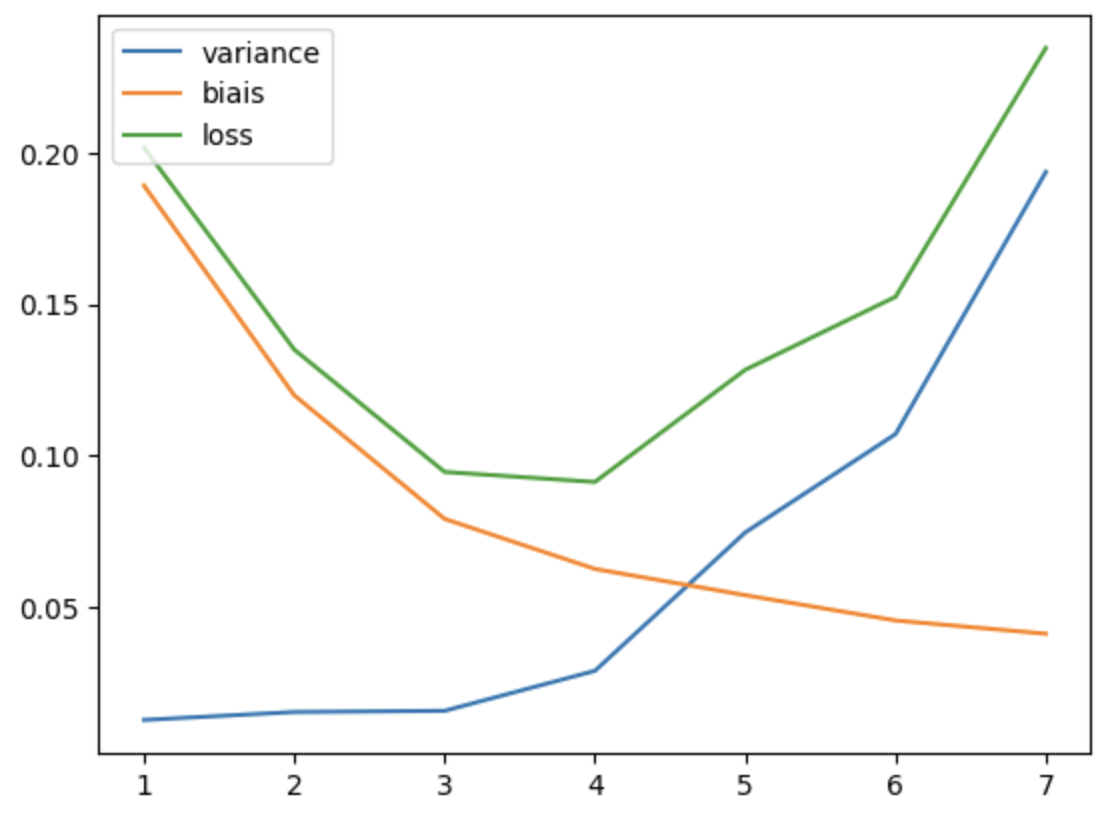


*  plus le paramètre 'tuning' est grand et plus la flexibilité du modèle est grande
* Du point de vu de la loss, le meilleurs tuning serait 3 ou 4.
* si notre patron veut favoriser la 'reproductibilité' (ou robustesse) de nos expériences, on va choisir le tuning de 3 plutôt que 4.